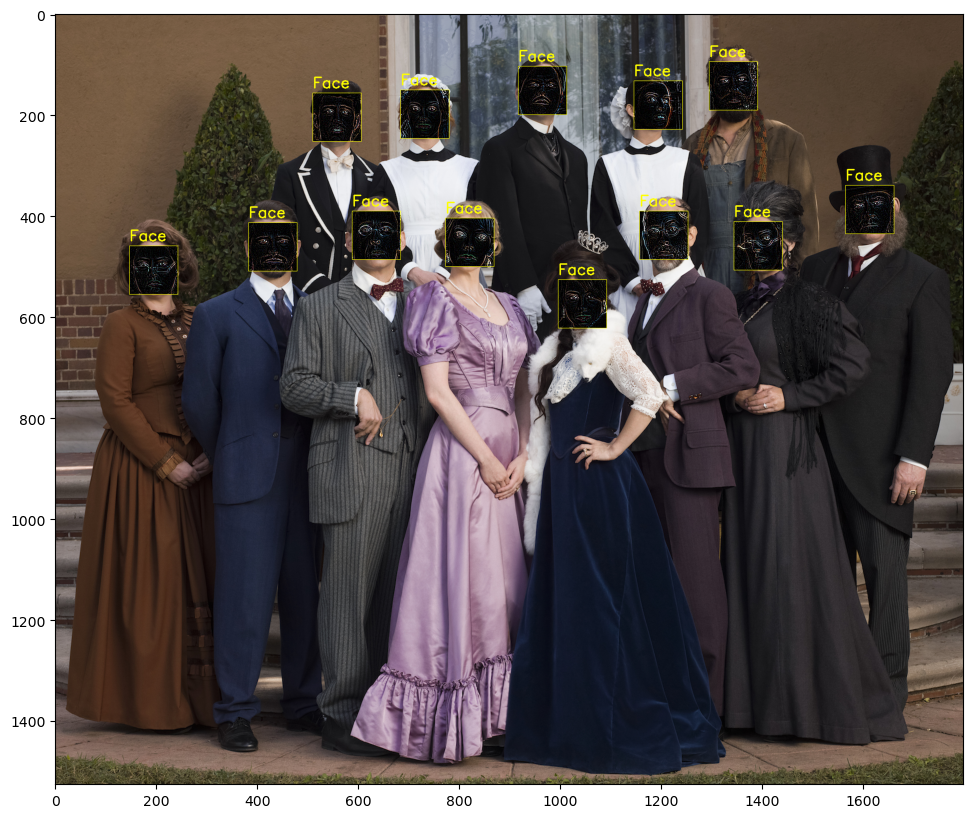

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

# load in color image for face detection
image = cv2.imread('multi_faces.jpg')


kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

# check if image is not None
if image is not None:
    # convert to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # load in cascade classifier
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    
    # check if face_cascade is not None
    if face_cascade is not None:
        
        # run the detector on the grayscale image
        faces = face_cascade.detectMultiScale(gray, 4, 5)
        
        # check if any faces were detected
        if len(faces) > 0:
            img_with_detections = np.copy(image)

            # loop over our detections and draw their corresponding boxes on top of our original image
            for (x,y,w,h) in faces:
                
                # Apply the filter using convolution
                img_with_detections[y:y+h,x:x+w] = cv2.filter2D(img_with_detections[y:y+h,x:x+w], -1, kernel)
                
                # draw next detection as a red rectangle on top of the original image
                cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,255,0),1)
                
                # add a label to the detected face rectangle
                cv2.putText(img_with_detections, "Face", (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,0), 2)

            # display the result
            plt.figure(figsize=(20,10))
            plt.imshow(img_with_detections)
            plt.show()
        else:
            print("No faces detected.")
    else:
        print("Haar Cascade classifier XML file not loaded.")
else:
    print("Image file not loaded.")
